<a href="https://colab.research.google.com/github/Nisha0202/Data-Analysis/blob/main/Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


In [ ]:
csv_file_name = "student-por.csv"


In [ ]:
df = pd.read_csv( csv_file_name )
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
target_column_name = "G3" #taking Final grades as targeted coloumn

In [ ]:
categorical_target_column = True
#categorical_target_column = False


In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 649
Total Number of Columns : 33


In [ ]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: G3, dtype: int64


Text(0.5, 1.0, 'Total Number of Null values for Each Column')

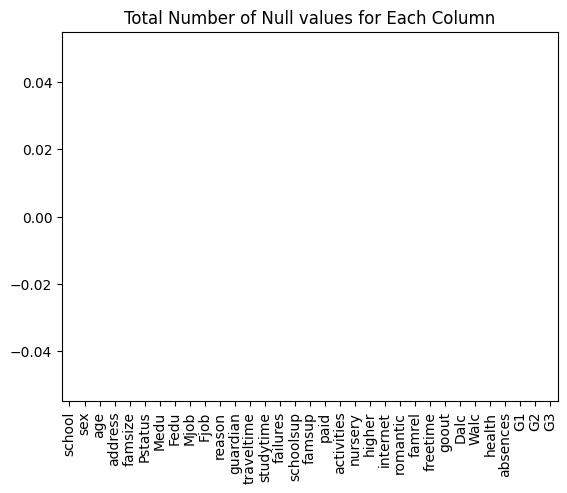

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


**Observation**

No null values in this dataset

In [ ]:
droped_column_names = [ "address" ,  "famsize" , "Dalc" , "Walc"]

df.drop( droped_column_names , axis = 1 ,inplace = True)


**Observation**

address is unique, famsize and Dalc, Walc can e ignored. Dalc and Walc can be ignored as health coloumn exist.

In [ ]:
df

,school,sex,age,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,A,4,4,at_home,teacher,course,mother,...,no,no,4,3,4,3,4,0,11,11
1,GP,F,17,T,1,1,at_home,other,course,father,...,yes,no,5,3,3,3,2,9,11,11
2,GP,F,15,T,1,1,at_home,other,other,mother,...,yes,no,4,3,2,3,6,12,13,12
3,GP,F,15,T,4,2,health,services,home,mother,...,yes,yes,3,2,2,5,0,14,14,14
4,GP,F,16,T,3,3,other,other,home,father,...,no,no,4,3,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,T,2,3,services,other,course,mother,...,yes,no,5,4,2,5,4,10,11,10
645,MS,F,18,T,3,1,teacher,services,course,mother,...,yes,no,4,3,4,1,4,15,15,16
646,MS,F,18,T,1,1,other,other,course,mother,...,no,no,1,1,1,5,6,11,12,9
647,MS,M,17,T,3,1,services,services,course,mother,...,yes,no,2,4,5,2,6,10,10,10


In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



Maximum Null values in column (Before Handling)  : 0

------Replaced Null Values-------

Maximum Null values in column (After Handling)  : 0


In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    100.0
dtype: float64


**Observation**

100% data is unique(no duplication)

In [ ]:
#dropping some textul columns and some less important columns
droped_column_names = [ "Mjob" ,  "Fjob" , "reason" , "guardian", "failures", "schoolsup", "famsup", "Medu", "Fedu" , "traveltime", "freetime", "school"]

df.drop( droped_column_names , axis = 1 ,inplace = True)
df

,sex,age,Pstatus,studytime,paid,activities,nursery,higher,internet,romantic,famrel,goout,health,absences,G1,G2,G3
0,F,18,A,2,no,no,yes,yes,no,no,4,4,3,4,0,11,11
1,F,17,T,2,no,no,no,yes,yes,no,5,3,3,2,9,11,11
2,F,15,T,2,no,no,yes,yes,yes,no,4,2,3,6,12,13,12
3,F,15,T,3,no,yes,yes,yes,yes,yes,3,2,5,0,14,14,14
4,F,16,T,2,no,no,yes,yes,no,no,4,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,T,3,no,yes,no,yes,yes,no,5,2,5,4,10,11,10
645,F,18,T,2,no,no,yes,yes,yes,no,4,4,1,4,15,15,16
646,F,18,T,2,no,yes,yes,yes,no,no,1,1,5,6,11,12,9
647,M,17,T,1,no,no,no,yes,yes,no,2,5,2,6,10,10,10


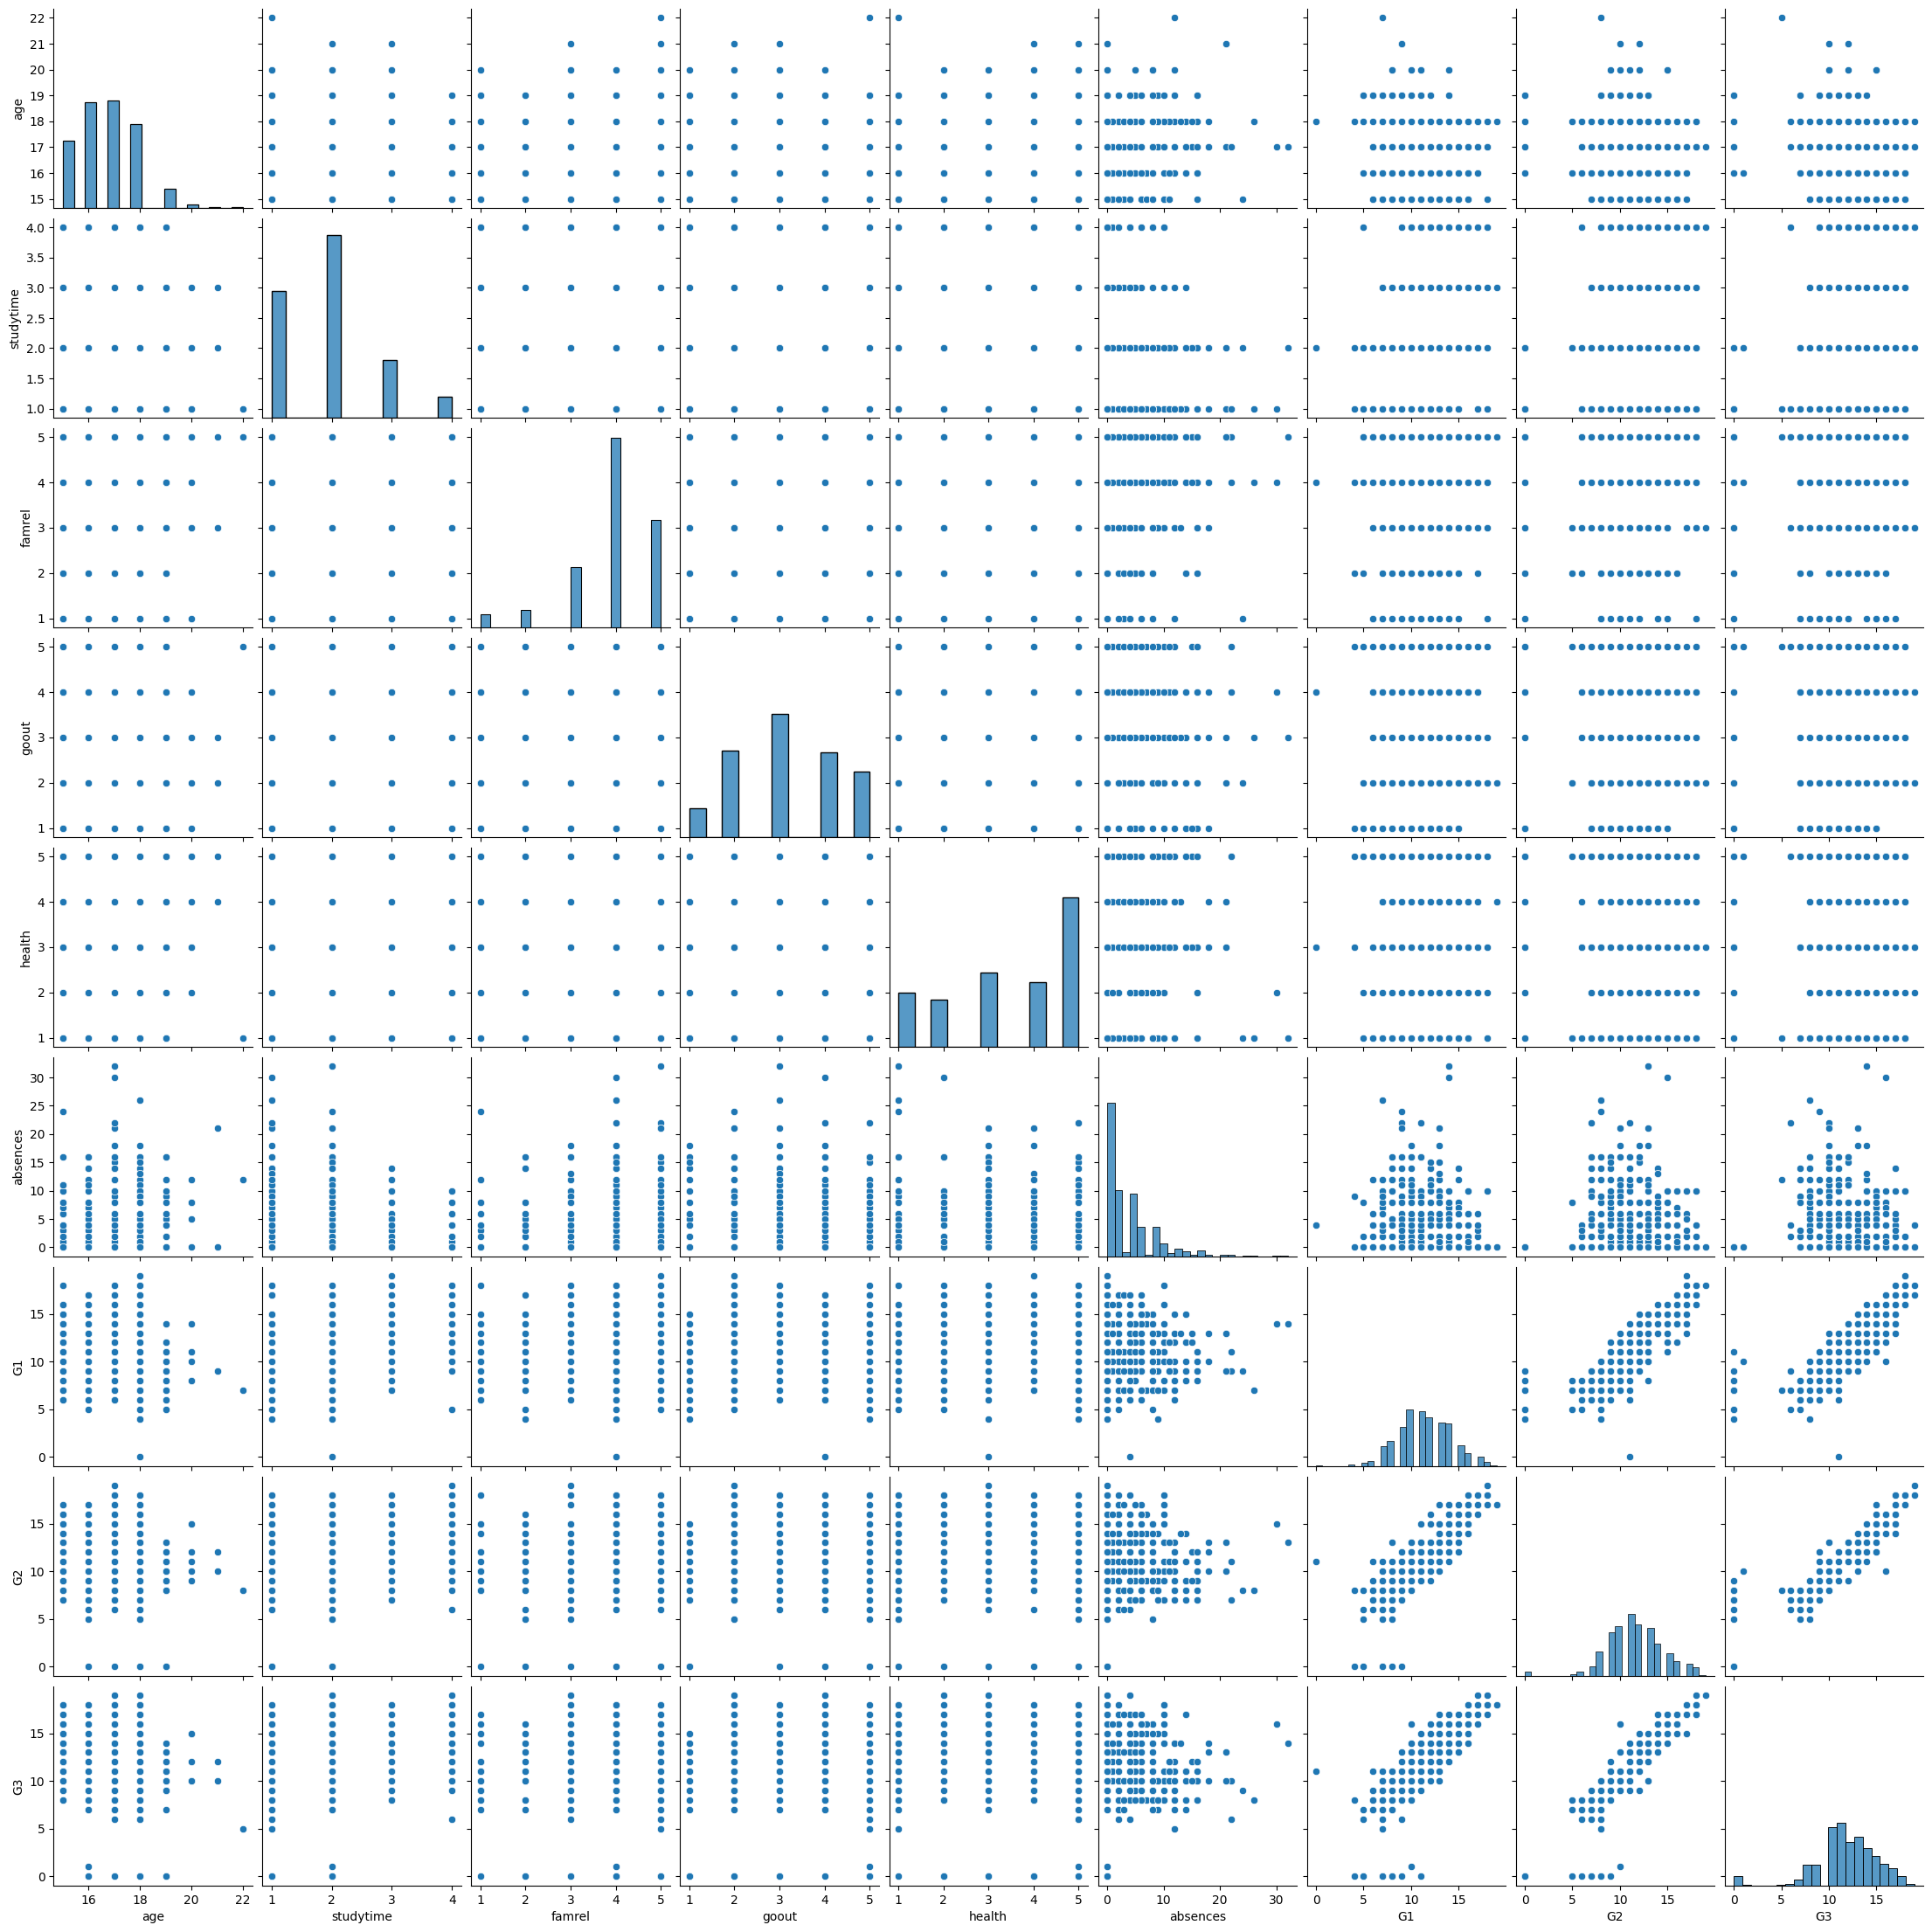

In [ ]:

#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

**OBSERVATION**

From the pair plot above some of the observations are :-  
1. **G3(Final Grades):** From the histogram analysis we can see the grades are left-skewed. Most of the students scored more than 10.
2. **G2 and G1:** Both are zero-skewed. Most students scored average or near average.
3. **absences:** From histogram we can see absences is highly right-skewed. Most students were presents and absent rate were low.
4. **health and absences:** Students who have poor health were slightly more absent.
5. **famrel:** It is left-skewed. Most of the students have good relation with their parents.



In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         649 non-null    object
 1   age         649 non-null    int64 
 2   Pstatus     649 non-null    object
 3   studytime   649 non-null    int64 
 4   paid        649 non-null    object
 5   activities  649 non-null    object
 6   nursery     649 non-null    object
 7   higher      649 non-null    object
 8   internet    649 non-null    object
 9   romantic    649 non-null    object
 10  famrel      649 non-null    int64 
 11  goout       649 non-null    int64 
 12  health      649 non-null    int64 
 13  absences    649 non-null    int64 
 14  G1          649 non-null    int64 
 15  G2          649 non-null    int64 
 16  G3          649 non-null    int64 
dtypes: int64(9), object(8)
memory usage: 86.3+ KB


-----------------Unique Values per column--------------------------------




sex            2
age            8
Pstatus        2
studytime      4
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
goout          5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

In [ ]:
# dropping some more columns for better graph analysis
droped_column_names = [ "paid"]

df.drop( droped_column_names , axis = 1 ,inplace = True)



categorical_columns = ["sex" , "Pstatus" ,"activities" ,"nursery" , "higher","internet", "romantic", "famrel", "goout", "health"]
numeric_columns = [ "age" , "studytime","G1", "G2", "G3", "absences"]

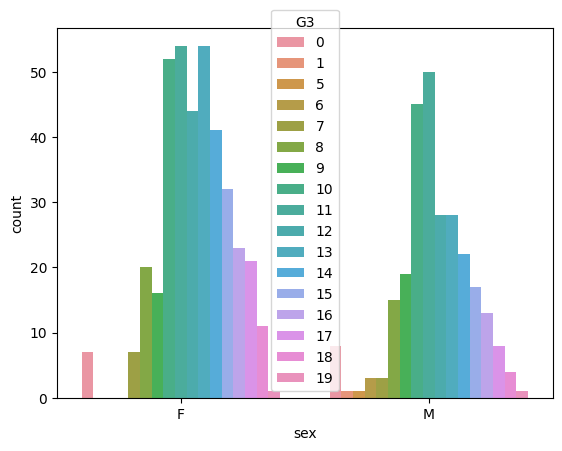

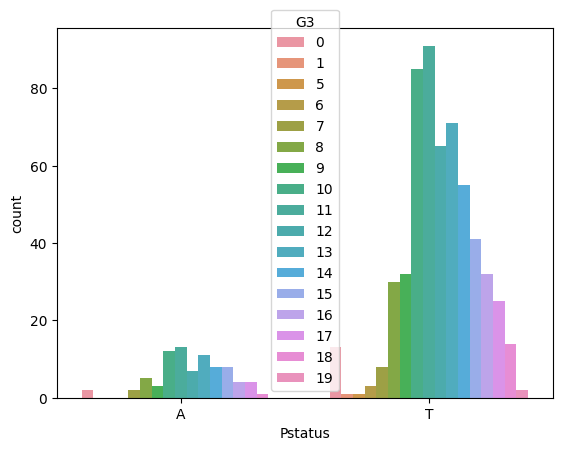

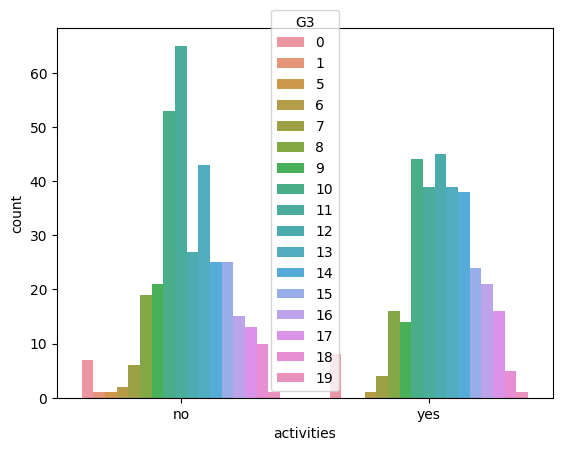

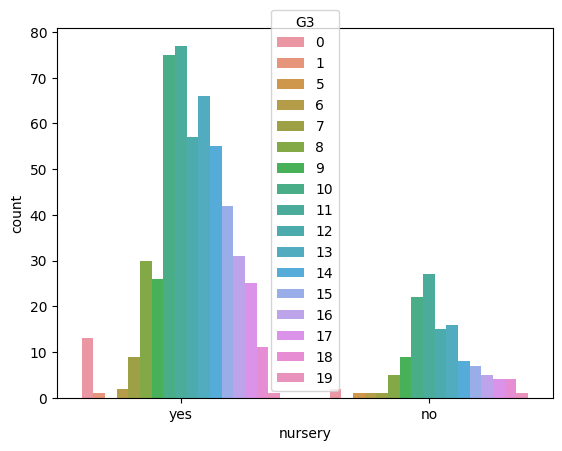

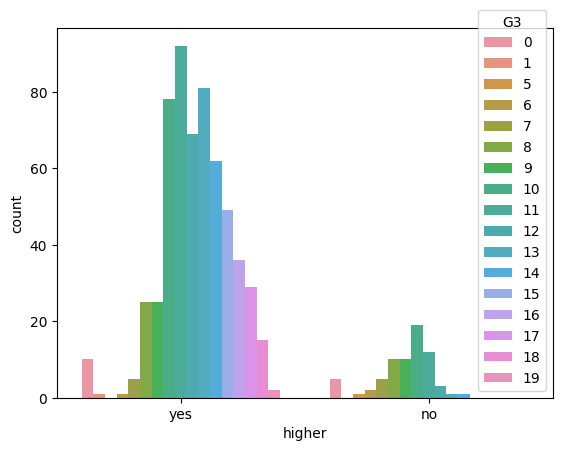

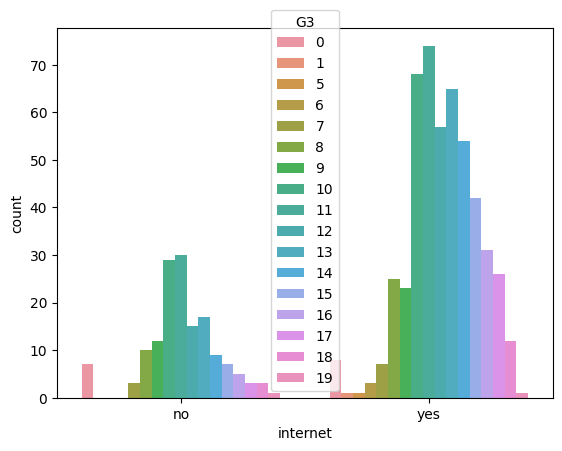

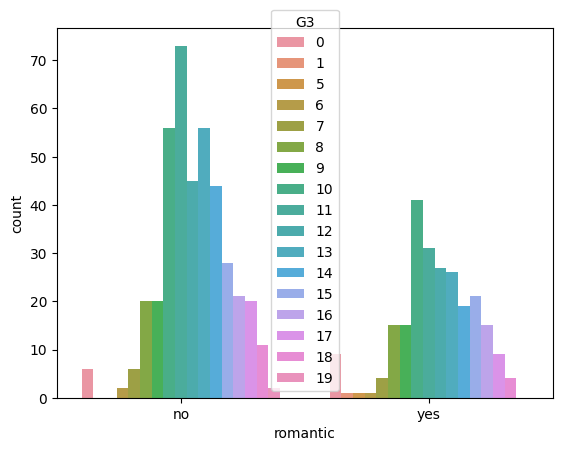

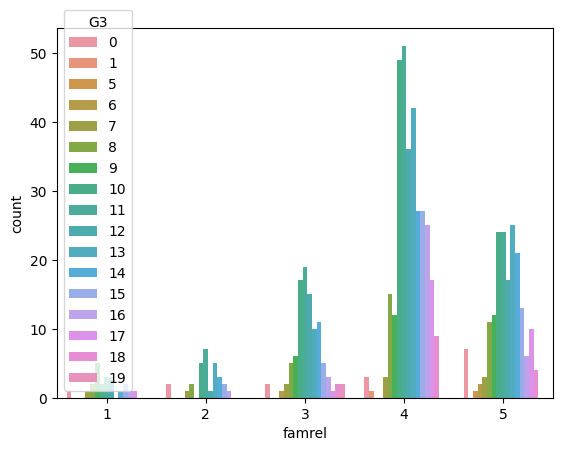

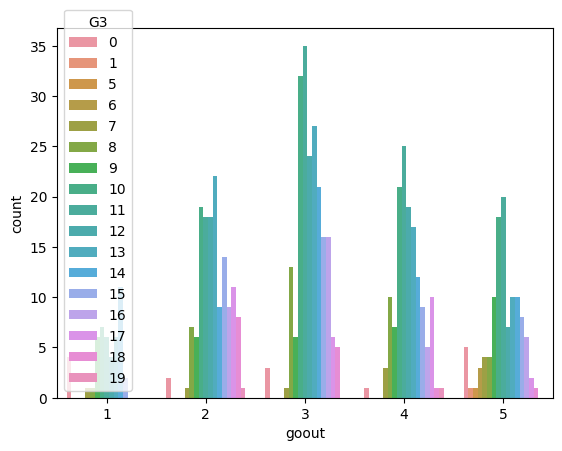

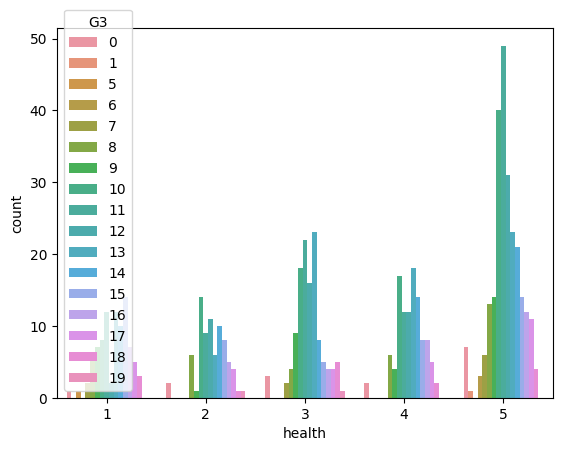

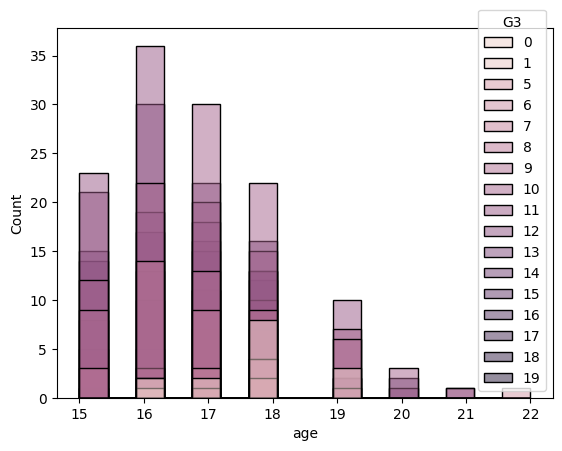

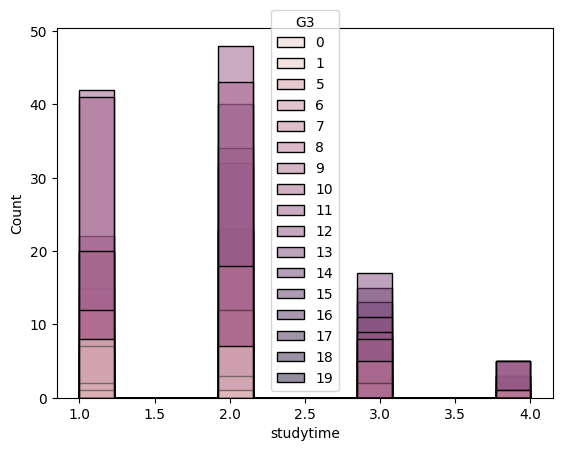

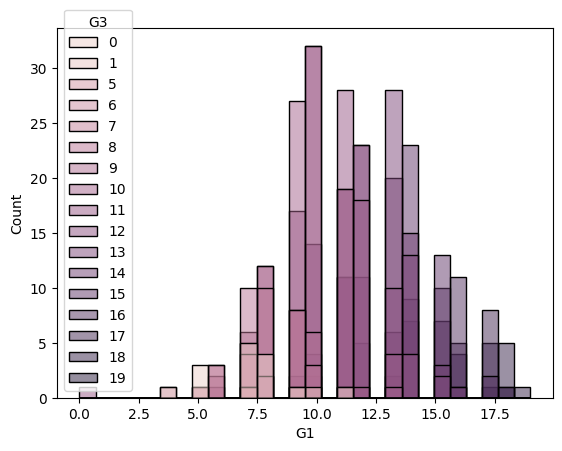

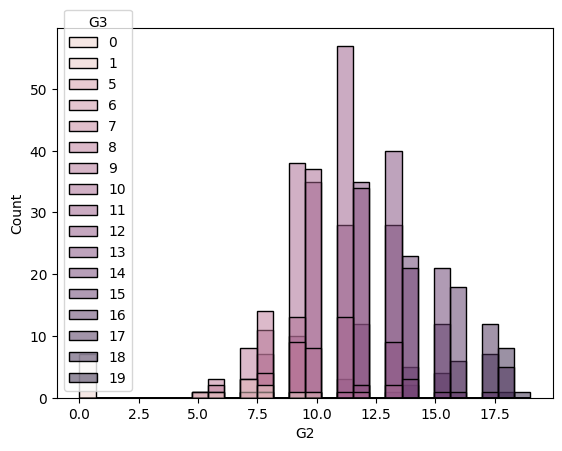

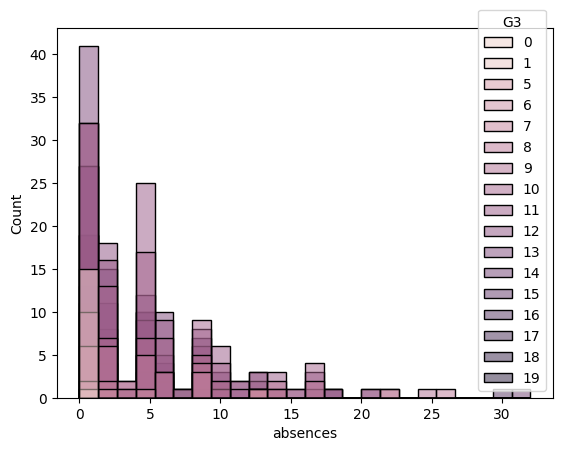

In [ ]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()



**OBSERVATION**

1. **absences and G3:** Those who were less absent scored better than average in finals.
2. **G2 and G3:** Those who scored well in G2, mostly scored well in finals.
3. **G1 and G3:** Those who scored well in G1, mostly scored well in finals.
4. **Studytime and G3:** Those who studied for 3 hours daily scored beter.
5. **Pstatus and G3:** Those who live with parents scored better.
6. **activities and G3:** Those who participated in extra-curricular activities scored better in finals.
7. **age and G3:** We can see most good scorer in G3 are 16. All the student in 21 scored well in G3.

In [ ]:
df

,sex,age,Pstatus,studytime,activities,nursery,higher,internet,romantic,famrel,goout,health,absences,G1,G2,G3
0,F,18,A,2,no,yes,yes,no,no,4,4,3,4,0,11,11
1,F,17,T,2,no,no,yes,yes,no,5,3,3,2,9,11,11
2,F,15,T,2,no,yes,yes,yes,no,4,2,3,6,12,13,12
3,F,15,T,3,yes,yes,yes,yes,yes,3,2,5,0,14,14,14
4,F,16,T,2,no,yes,yes,no,no,4,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,T,3,yes,no,yes,yes,no,5,2,5,4,10,11,10
645,F,18,T,2,no,yes,yes,yes,no,4,4,1,4,15,15,16
646,F,18,T,2,yes,yes,yes,no,no,1,1,5,6,11,12,9
647,M,17,T,1,no,no,yes,yes,no,2,5,2,6,10,10,10


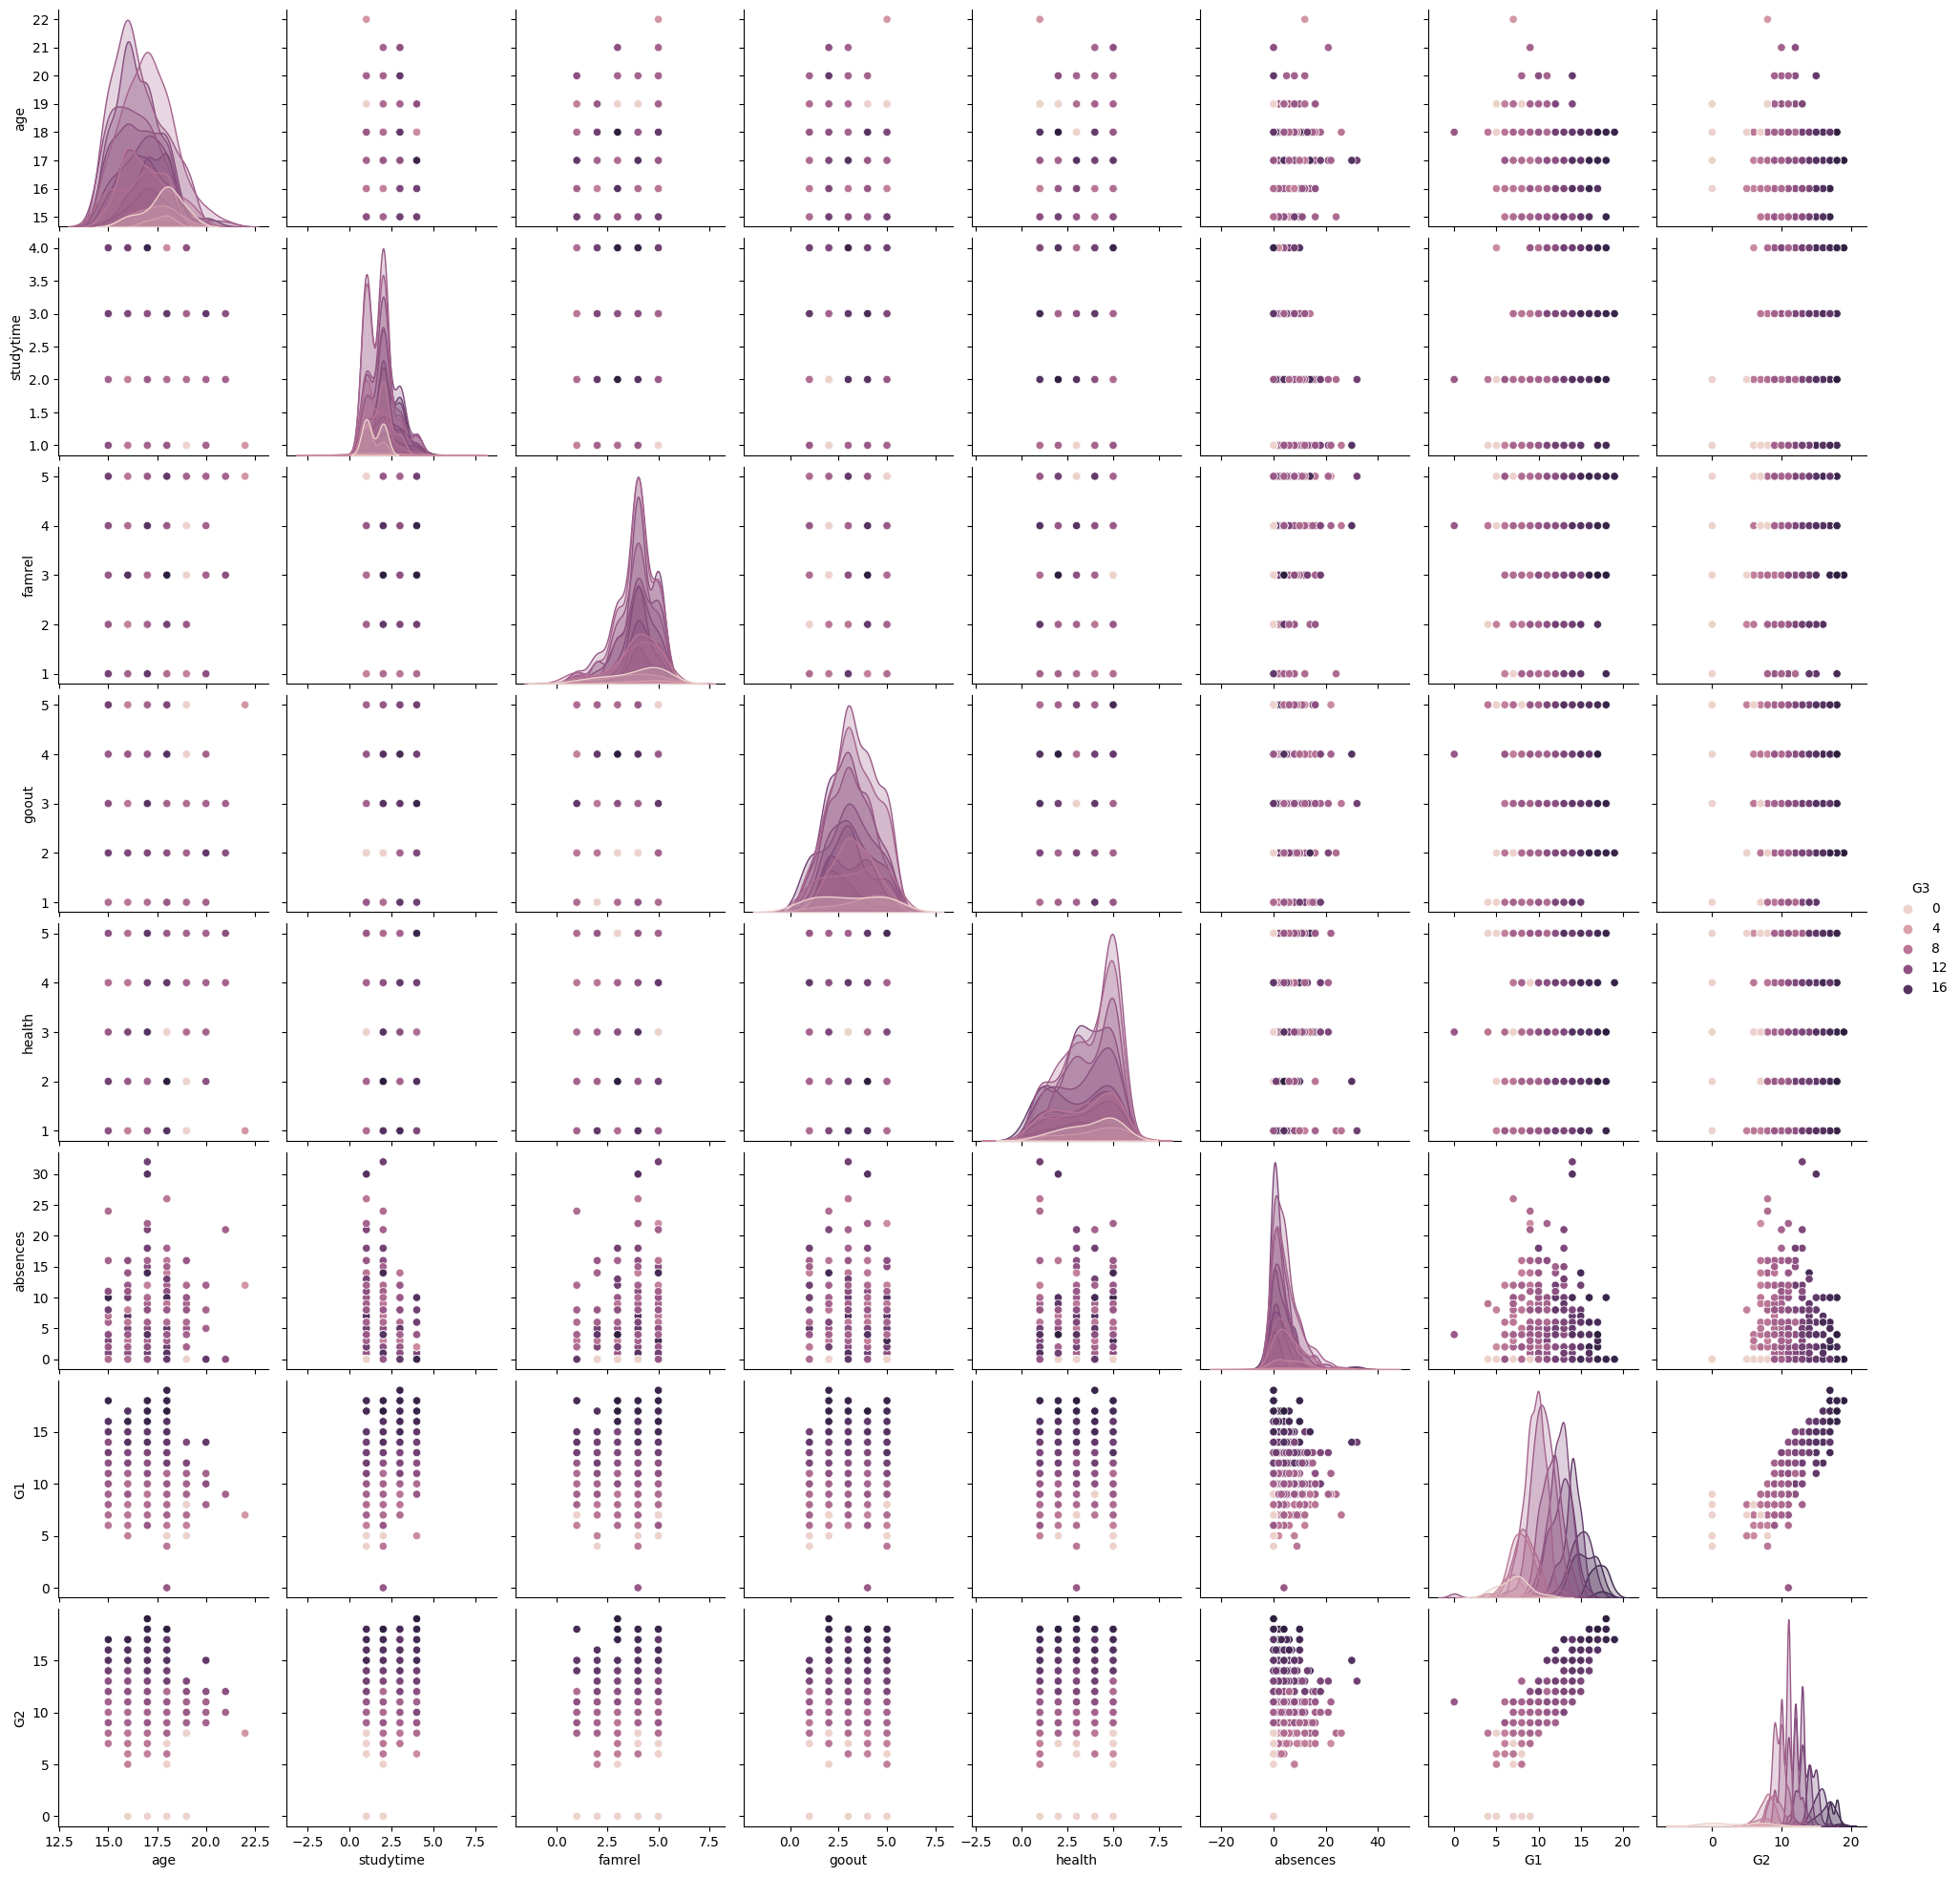

In [ ]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

OBSERVATION
Getting same observation as before. As such:
1. **age and G3:** We can see those who are aged around 16 has dark color more indicating their scores. Most of the students who did well in G3 are 16.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         649 non-null    object
 1   age         649 non-null    int64 
 2   Pstatus     649 non-null    object
 3   studytime   649 non-null    int64 
 4   activities  649 non-null    object
 5   nursery     649 non-null    object
 6   higher      649 non-null    object
 7   internet    649 non-null    object
 8   romantic    649 non-null    object
 9   famrel      649 non-null    int64 
 10  goout       649 non-null    int64 
 11  health      649 non-null    int64 
 12  absences    649 non-null    int64 
 13  G1          649 non-null    int64 
 14  G2          649 non-null    int64 
 15  G3          649 non-null    int64 
dtypes: int64(9), object(7)
memory usage: 81.2+ KB


<Axes: >

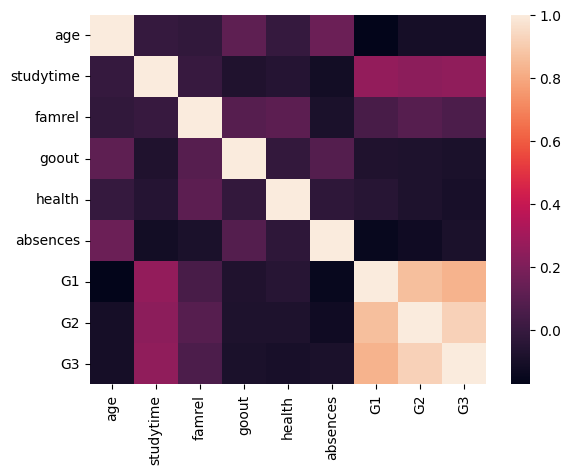

In [ ]:
#Correlation HeatMap for numeric columns among the dataset
sns.heatmap(df.corr( numeric_only =  True))

**OBSERVATION**


1. A strong positive correlation has been observed between the "age" and "G3" columns. The older you are the higher chances you score well in G3. All the student who are 21 scored well in G3.
2. G2 and G1 has not much correlation with G3 score.
3. The 'studytime' and 'absences' column has strong positive correlation. It means those who were more absent are studying more.
4. The 'health' and 'absences' has weak positive correlation. It seems not always absent happened caused by sickness.
5. The column 'G3'and 'studytime' has strong positive correlation. So, more you study, you score better.






In [ ]:
#svm

In [ ]:
df = pd.read_csv( csv_file_name )
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [ ]:

X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

In [ ]:
print(len(target_class))
print(len(recall_score(y_test, y_pred, average=None)))

17
15


**Observation**

target_class length and recall score length don't match.
So, I split target_class

In [ ]:
target_class = target_class[:15]

In [ ]:
print(len(target_class))
print(len(recall_score(y_test, y_pred, average=None)))

15
15


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.62      0.56      0.59         9
           6       0.00      0.00      0.00         9
           7       0.40      0.59      0.48        27
           8       0.50      0.60      0.55        35
           9       0.30      0.12      0.17        25
          10       0.35      0.68      0.46        22
          11       0.10      0.06      0.08        16
          12       0.42      0.62      0.50        13
          13       0.00      0.00      0.00        13
          14       0.21      0.50      0.30         8
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         1

    accuracy                           0.39       195
   macro avg       0.24      0.29      0.25       195
weighted avg       0.32   

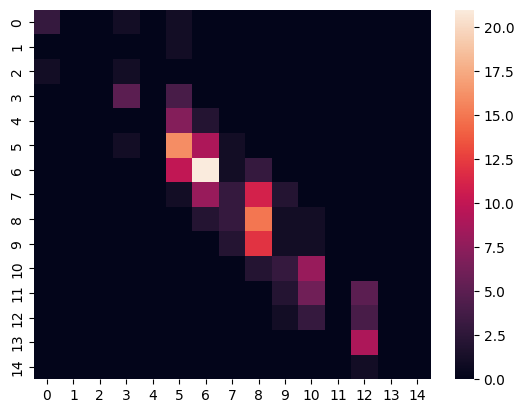

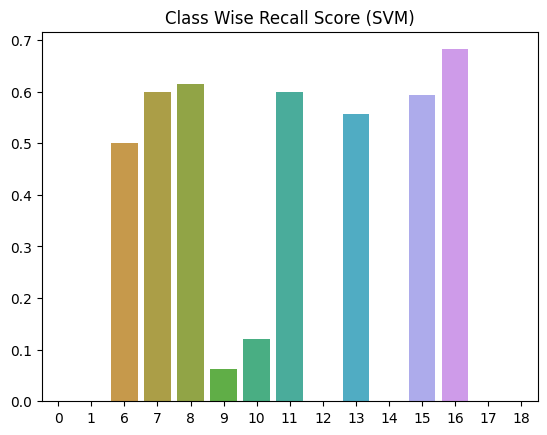

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


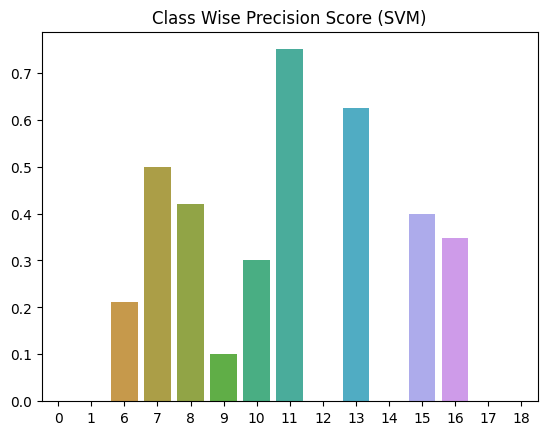

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

**OBSERVATION**

The model seems to be performing well on class 0 with a precision of 0.75, recall of 0.60, and f1-score of 0.67. But, it’s performing poorly on several classes like 3, 4, 6, 13, 15, and 16 where precision, recall, and f1-score are all 0.00. The overall accuracy of the model is 0.39, which means it’s correct about 39% with the test data. The macro and weighted averages for precision, recall, and f1-score gives a sense of the overall performance of the model for all classes.



              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.33      0.22      0.27         9
           6       0.20      0.22      0.21         9
           7       0.40      0.44      0.42        27
           8       0.42      0.31      0.36        35
           9       0.38      0.36      0.37        25
          10       0.42      0.45      0.43        22
          11       0.40      0.38      0.39        16
          12       0.33      0.38      0.36        13
          13       0.10      0.08      0.09        13
          14       0.19      0.38      0.25         8
          15       0.80      0.44      0.57         9
          16       0.00      0.00      0.00         1

    accuracy                           0.35       195
   macro avg       0.30      0.30      0.29       195
weighted avg       0.37   

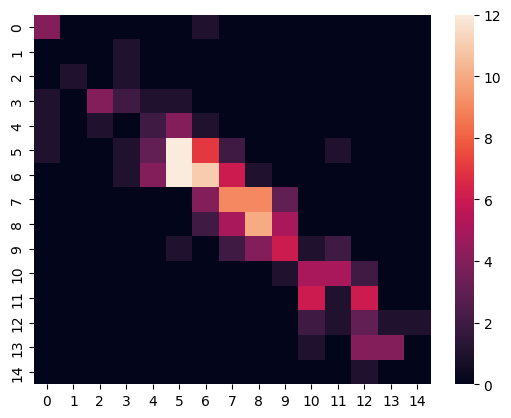

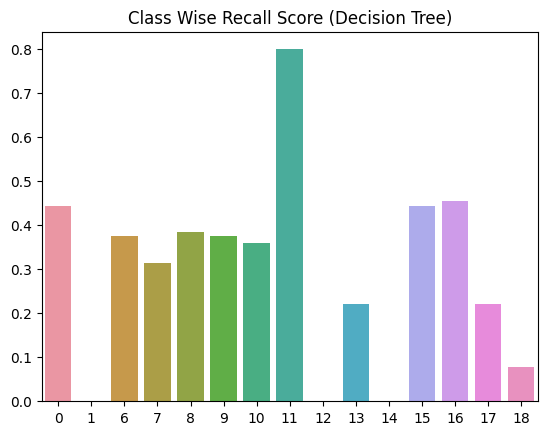

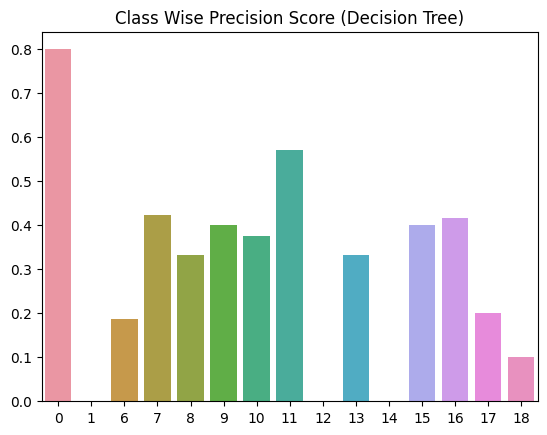

In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

**OBSERVATION**

The model seems to be performing well on class 0 with a precision of 0.57, recall of 0.80, and f1-score of 0.67.  But, it’s performing poorly on several classes like 3, 4, 13, and 16 where precision, recall, and f1-score are all 0.00. The overall accuracy of the model is 0.35, which means it’s correct about 35% of the time on the test data. The macro and weighted averages for precision, recall, and f1-score gives a sense of the overall performance of the model across all classes.